#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
dataset=pd.read_csv(r"C:\Users\Gupta\Downloads\churn-train.csv")

#### Check the data and table  

In [2]:
#Data Table
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,61,No,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',33.60,2117.2,No
1,Male,0,Yes,Yes,72,Yes,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',90.45,6565.85,No
2,Female,0,No,No,5,Yes,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',84.00,424.75,No
3,Female,0,No,No,49,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',67.40,3306.85,No
4,Male,0,No,No,8,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',19.70,168.9,No


<BarContainer object of 20 artists>

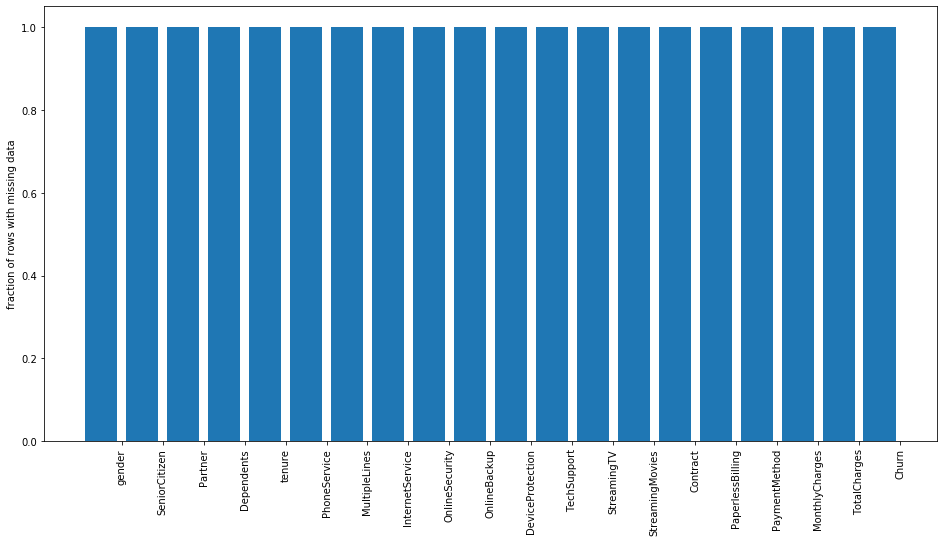

In [5]:
#checking the features values missing
import matplotlib.pyplot as plt
null_counts=dataset.notnull().sum()/len(dataset)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

There is no missing values in the Dataset.

In [6]:
#check the categorical and numerical features
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   object 
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   object 
 3   Dependents        4695 non-null   object 
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   object 
 6   MultipleLines     4695 non-null   object 
 7   InternetService   4695 non-null   object 
 8   OnlineSecurity    4695 non-null   object 
 9   OnlineBackup      4695 non-null   object 
 10  DeviceProtection  4695 non-null   object 
 11  TechSupport       4695 non-null   object 
 12  StreamingTV       4695 non-null   object 
 13  StreamingMovies   4695 non-null   object 
 14  Contract          4695 non-null   object 
 15  PaperlessBilling  4695 non-null   object 
 16  PaymentMethod     4695 non-null   object 


The info() represent the how many features/columns are present in the Table/data and also provide the information of each
feature datatype.
The generally object data type are categorical feature And others  data type such as (Int64 and float) 
are numerical feature.

In [7]:
#Separate the categorical featurea and numerical features
cat_data=dataset.select_dtypes(include=['object']).copy()
cat_data_update=cat_data.drop(columns='TotalCharges') # TotalCharges is a numerical feature but dtype is object
cat_data_update.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Male,Yes,Yes,No,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',No
1,Male,Yes,Yes,Yes,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',No
2,Female,No,No,Yes,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',No
3,Female,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',No
4,Male,No,No,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',No


### Visualization of the dataset

In [8]:
# Import the visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt 

In [9]:
#convert the object into float64 data type (Numerical value)
dataset["TotalCharges"]=pd.to_numeric(dataset["TotalCharges"],errors='coerce')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CCA0C2C708>,
      dtype=object)

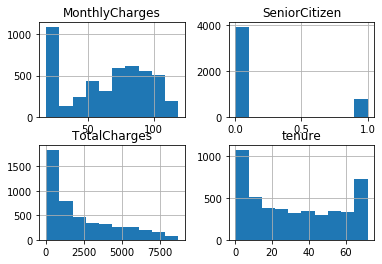

In [10]:
#visualize the numerical value
dataset.hist()

In [12]:
#converting all the categorical feature into numerical using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
cat_data_update_hot1=cat_data_update.copy()
hot1=OneHotEncoder()
onehot_num= pd.get_dummies(cat_data_update_hot1)

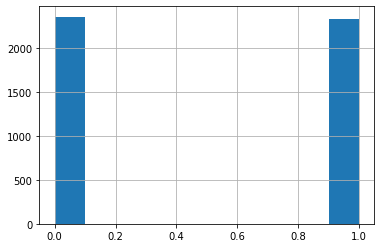

In [13]:
onehot_num["gender_Female"].hist()

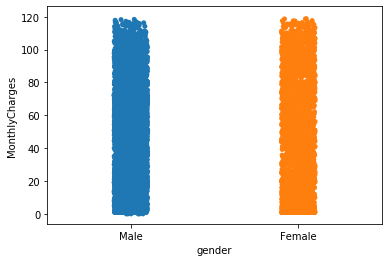

In [14]:
sns.stripplot(y=dataset['tenure'],x=dataset['Churn'])
sns.stripplot(x=dataset['gender'],y=dataset['MonthlyCharges'],)

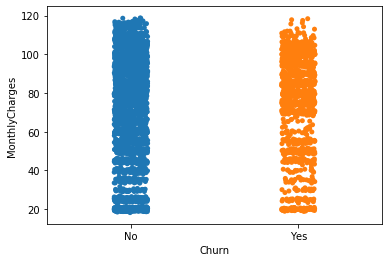

In [15]:
sns.stripplot(x=dataset['Churn'],y=dataset['MonthlyCharges'])

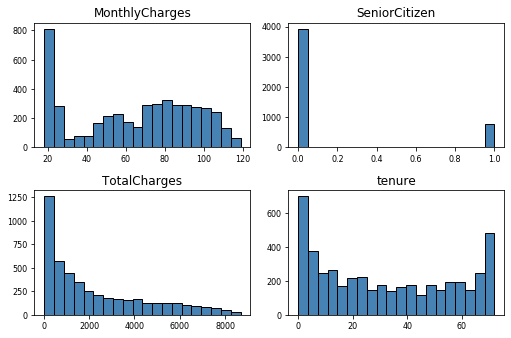

In [16]:
dataset.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

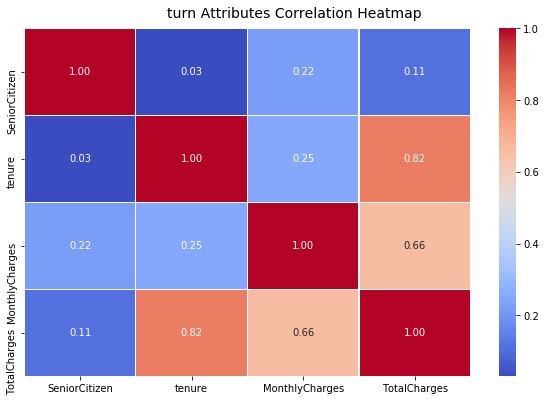

In [17]:
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('turn Attributes Correlation Heatmap', fontsize=14)

In [18]:
other_data=dataset.select_dtypes(include=['float64','int64']).copy()
other_data.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,61,33.60,2117.20
1,0,72,90.45,6565.85
2,0,5,84.00,424.75
3,0,49,67.40,3306.85
4,0,8,19.70,168.90


Text(0, 0.5, 'Wine Alcohol %')

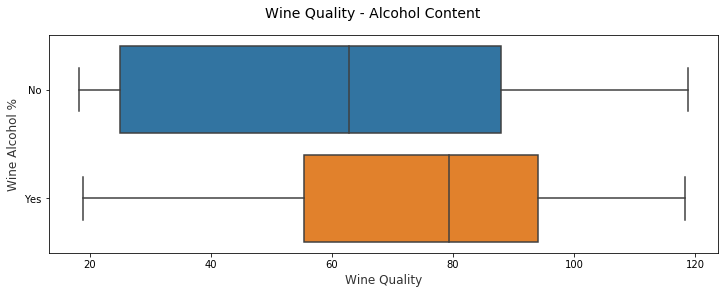

In [19]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="MonthlyCharges", y="Churn", data=dataset,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   object 
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   object 
 3   Dependents        4695 non-null   object 
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   object 
 6   MultipleLines     4695 non-null   object 
 7   InternetService   4695 non-null   object 
 8   OnlineSecurity    4695 non-null   object 
 9   OnlineBackup      4695 non-null   object 
 10  DeviceProtection  4695 non-null   object 
 11  TechSupport       4695 non-null   object 
 12  StreamingTV       4695 non-null   object 
 13  StreamingMovies   4695 non-null   object 
 14  Contract          4695 non-null   object 
 15  PaperlessBilling  4695 non-null   object 
 16  PaymentMethod     4695 non-null   object 


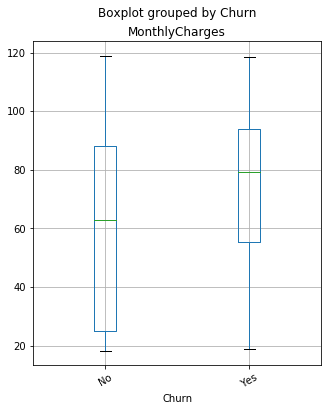

In [22]:
dataset.boxplot('MonthlyCharges','Churn',rot = 30,figsize=(5,6))

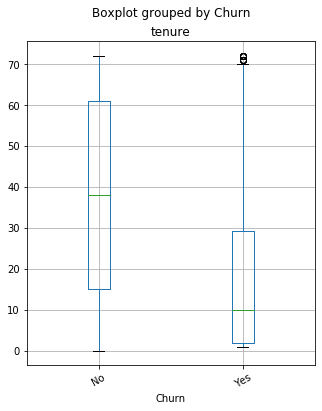

In [72]:
dataset.boxplot('tenure','Churn',rot = 30,figsize=(5,6))

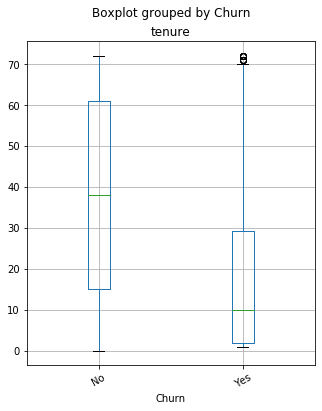

In [23]:
dataset.boxplot('tenure','Churn',rot = 30,figsize=(5,6))

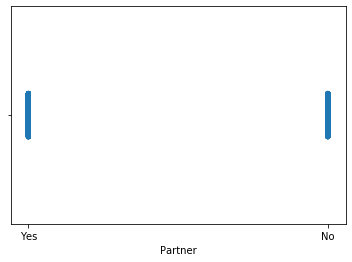

In [74]:
sns.stripplot(x="Partner",data=dataset)

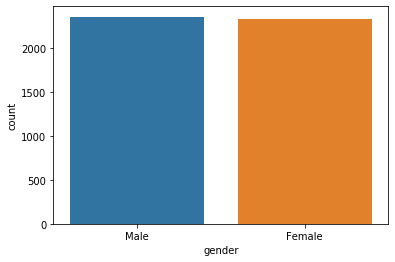

In [24]:
sns.countplot(x='gender',data=dataset)

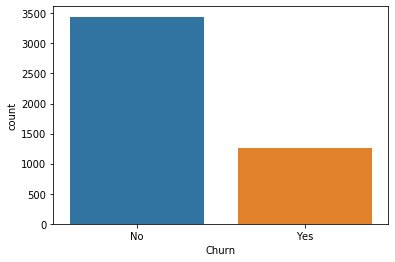

In [76]:
sns.countplot(x="Churn",data=dataset)

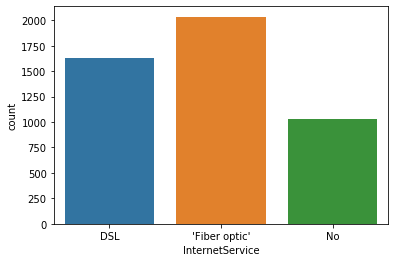

In [77]:
sns.countplot(cat_data_update['InternetService'], data=dataset)

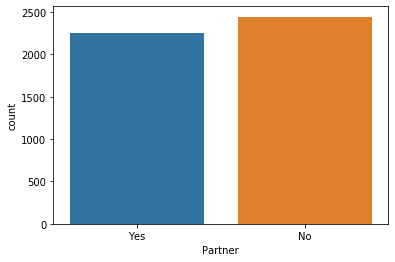

In [78]:
sns.countplot(x='Partner',data=dataset)

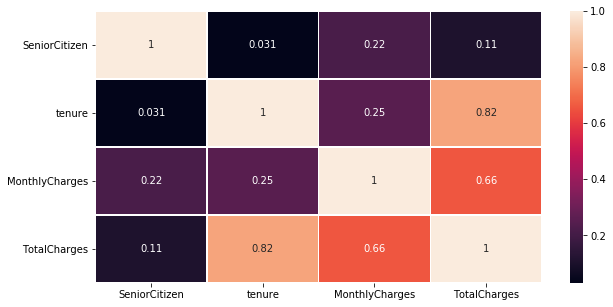

In [79]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,linewidth=0.4)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

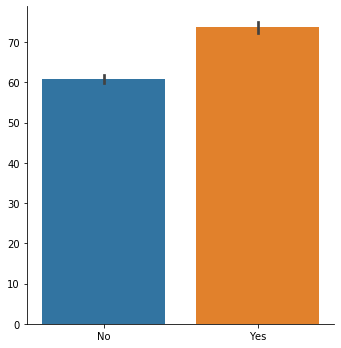

In [80]:
sns.catplot(x=dataset['Churn'],y=dataset['MonthlyCharges'], kind="bar",data=dataset)

In [ ]:
dataset['InternetService'].value_counts()

In [ ]:
dataset['Contract'].value_counts()

In [ ]:
sns.catplot(dataset['tenure'],dataset['MonthlyCharges'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CCA288FF48>,
      dtype=object)

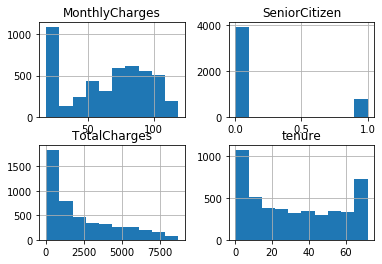